In [1]:
%matplotlib inline
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./df.csv', encoding='utf8')
# data['path'].head()
data.describe()

className                                  file   
count        9339                                  9339  \
unique         25                                  9339   
top     Allaple.A  000bde2e9a94ba41c0c111ffd80647c2.png   
freq         2949                                     1   

                                                     path  
count                                                9339  
unique                                               9339  
top     ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...  
freq                                                    1

In [3]:
# CONSTANTS
IMAGE_DIMENSION = 256
IMG_SIZE = (IMAGE_DIMENSION, IMAGE_DIMENSION)

In [4]:

full_path = ''

def getImages(path):
    print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    return np.array(image, dtype='float32')

# data['fullpath'] = './imgs/' + data['className'] + '' + data['path'].str.replace('.', '')
data['image'] = data['path'].apply(getImages)
data['image'].head()
data['ID'] = data.groupby('className').ngroup()
data.head()
# data['fullpath'].head()

./malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png
./malimg_paper_dataset_imgs/Adialer.C/000e30a0819ac7ed931d629ce2ef8948.png
./malimg_paper_dataset_imgs/Adialer.C/002f06eff1d222560939be72583d6ae9.png
./malimg_paper_dataset_imgs/Adialer.C/0044f0746b812f6b454ce210bc58c572.png
./malimg_paper_dataset_imgs/Adialer.C/0046a83d932a3d431eb21a99b46d6af7.png
./malimg_paper_dataset_imgs/Adialer.C/004935acac9e9afc9ffbddb20d5460d4.png
./malimg_paper_dataset_imgs/Adialer.C/008a92e720e896caea4a251e6a4c9934.png
./malimg_paper_dataset_imgs/Adialer.C/008cadcfa4ca85c4a4aaf901a70868cc.png
./malimg_paper_dataset_imgs/Adialer.C/009a2962fe18980a12e5b2d6208dc478.png
./malimg_paper_dataset_imgs/Adialer.C/00bb6b6a7be5402fcfce453630bfff19.png
./malimg_paper_dataset_imgs/Adialer.C/00c547ba11531d9357488cf1034fee3b.png
./malimg_paper_dataset_imgs/Adialer.C/00e10bb5c7467e2e52ec9505dd4c8e95.png
./malimg_paper_dataset_imgs/Adialer.C/00f505d965636db4d021f69747dd4281.png
./malimg_paper_dataset_im

className                                  file   
0  Adialer.C  000bde2e9a94ba41c0c111ffd80647c2.png  \
1  Adialer.C  000e30a0819ac7ed931d629ce2ef8948.png   
2  Adialer.C  002f06eff1d222560939be72583d6ae9.png   
3  Adialer.C  0044f0746b812f6b454ce210bc58c572.png   
4  Adialer.C  0046a83d932a3d431eb21a99b46d6af7.png   

                                                path   
0  ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...  \
1  ./malimg_paper_dataset_imgs/Adialer.C/000e30a0...   
2  ./malimg_paper_dataset_imgs/Adialer.C/002f06ef...   
3  ./malimg_paper_dataset_imgs/Adialer.C/0044f074...   
4  ./malimg_paper_dataset_imgs/Adialer.C/0046a83d...   

                                               image  ID  
0  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   0  
1  [[[59.0, 59.0, 59.0], [50.0, 50.0, 50.0], [6.0...   0  
2  [[[58.0, 58.0, 58.0], [50.0, 50.0, 50.0], [6.0...   0  
3  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   0  
4  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   0

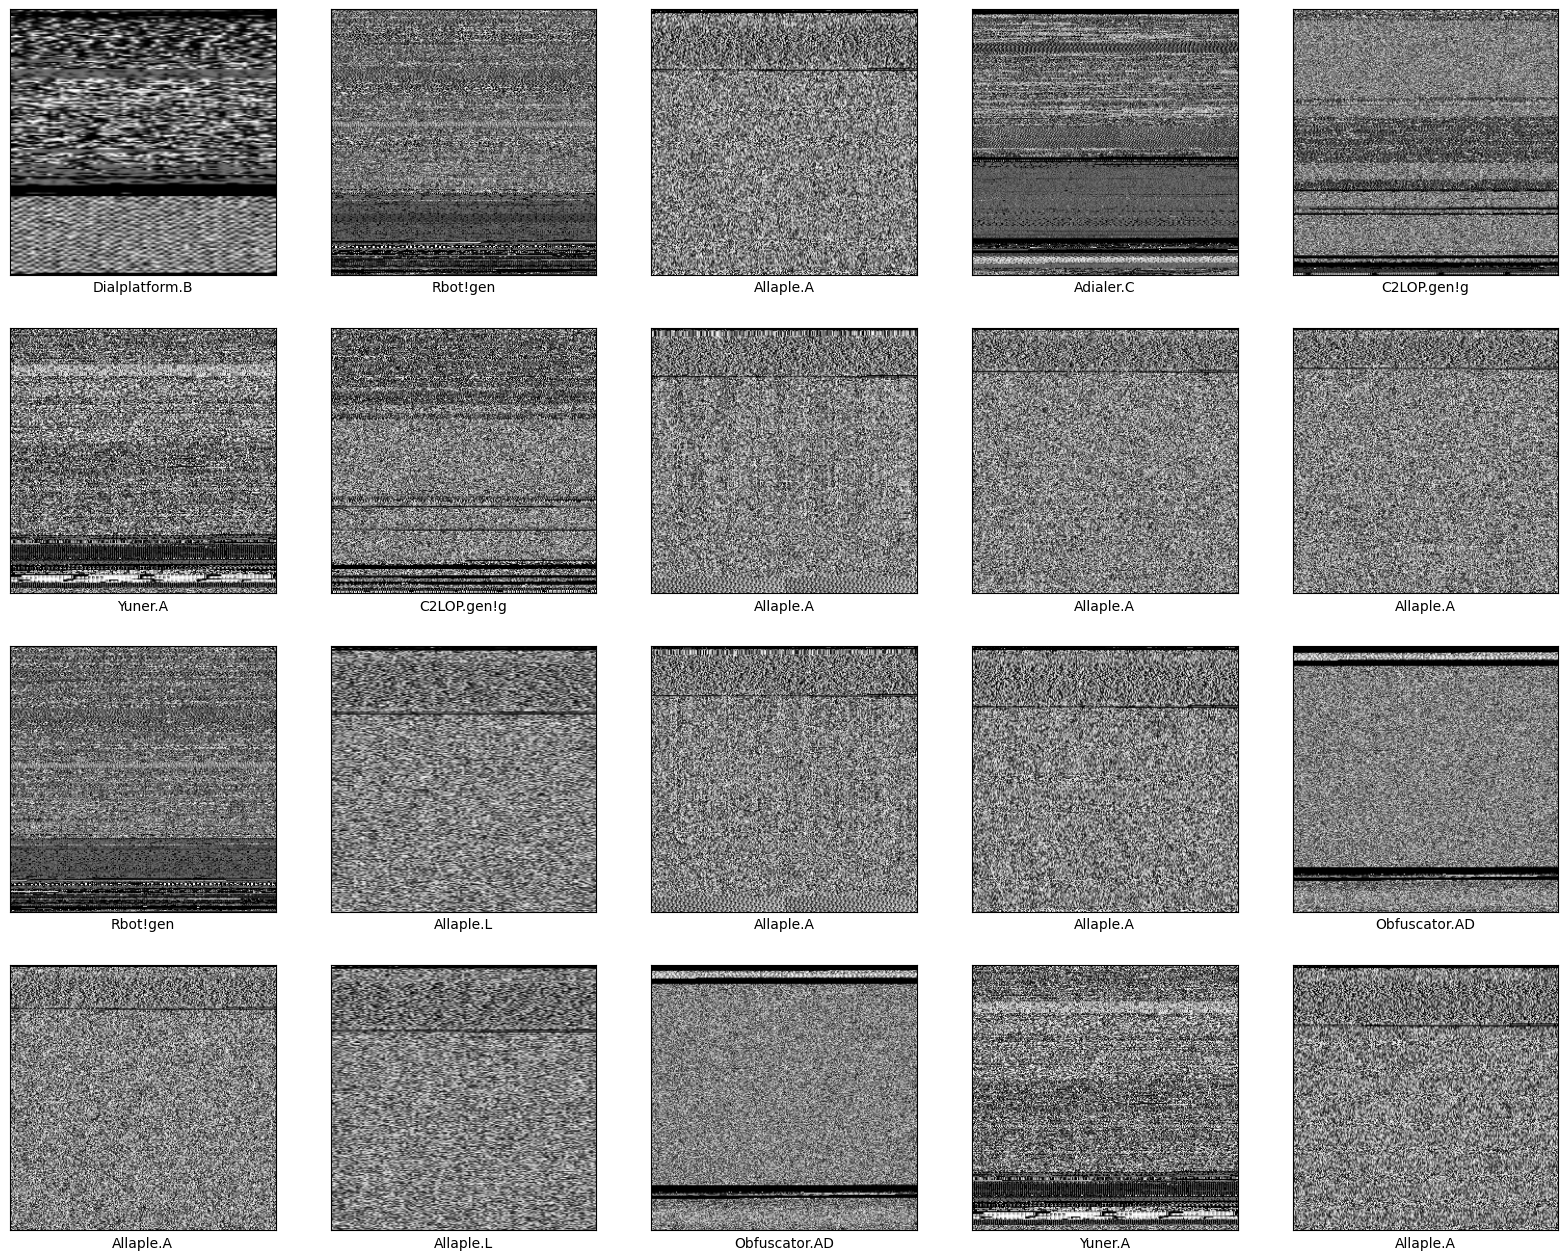

In [5]:
final_image = data.sample(20)
plt_size = (20, 20)
img = plt.figure(figsize=plt_size)
img_num = 0

for i, row in final_image.iterrows():
  plt.subplot(5, 5, img_num + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['className'])
  img_num += 1
plt.show()

In [6]:
data.iloc[0]

className                                            Adialer.C
file                      000bde2e9a94ba41c0c111ffd80647c2.png
path         ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...
image        [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
ID                                                           0
Name: 0, dtype: object

In [7]:
total_classes = np.unique(data.className)
number_of_total_classes = len(total_classes)
number_of_total_classes

25

In [8]:
images = []

for index, row in data.head(4000).iterrows():
    images.append(row["image"].astype(float))

images =  np.array(images)

In [9]:
len(images)
len(data)

9339

In [10]:
x_train = images
y_train = data.iloc[:, -1].values.astype('int32')
y = np.zeros((4000,26))
# print(y[8539])
for index, row in data.head(4000).iterrows():
    y[index][row['ID']] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '1.0')

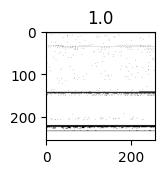

In [11]:
plt.subplot(331)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y[1][0])

In [12]:
print(len(x_train))
print(len(y))
train, X_stealed, target, y_stealed = train_test_split(x_train, y, test_size=0.50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.30, random_state=1)

data_len = len(data)
print('Val:', round(len(X_stealed) / 4000, 2))
print('Train:', round(len(X_train) / 4000, 2))
print('Test:', len(X_test) / 4000)

4000
4000
Val: 0.5
Train: 0.35
Test: 0.15


In [13]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), strides=(1, 1), input_shape=(IMAGE_DIMENSION, IMAGE_DIMENSION, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(26, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 512)               1

In [14]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [15]:
model.save('./model')
np.savetxt('y_val.txt', y_stealed, delimiter=',')
np.save('X_val.npy', X_stealed)

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


: 